<img src="./logo_UNSAM.jpg" align="right" width="150" />

# Tarea semanal 3 
**Carola Piazze Vicini**

## Introducción
El objetivo de este trabajo fue analizar el fenómeno de desparramo espectral, que se presenta al calcular la transformada discreta de Fourier (DFT). Para ello se trabajó con una señal senoidal, y se evaluó como la desintonía entre la frecuencia de la señal y los bins de la DFT afecta el gráfico de la densidad espectral de potencia (PSD). También se verofocó la identidad de Parseval y se exploró la técnica del zero padding como herramienta para mejorar la visualización del espectro.

#### Transformada Discreta de Fourier
La transformada de Fourier permite convertir una señal discreta en el tiempo, definida por una secuencia de muestras, a su representación en el dominio de la frecuencia. Lo hace descomponiendo la señal en una suma de senoidales de distintas frecuencias, mostrando cuánto aporta cada frecuencia al total de la señal.  
La DFT divide el espectro en intervalos discretos llamados *bins de frecuencia*, que actúan como contenedores donde se acumula la energía de cada componente. Cada bin corresponde a un múltiplo de la resolución espectral  $ [\Delta f = \frac{f_s}{N} ]  $ 
y está asociado al índice $k$ en la ecuación de la DFT. 

La DFT de una secuencia discreta $ x[n] $ de longitud $ N $  está definida como:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \, e^{-j \, 2\pi \, \frac{k}{N} \, n}, \quad k = 0,1,\dots,N-1
$$

Pero la DFT pura requiere $ N^2 $ operaciones, lo cual es costoso para el programa si la señal es larga; por eso utilizamos la FFT (fast fourier transform) ya que su algoritmo es más eficiente y calcula la misma DFT pero en un tiempo menor.

En este trabajo utilizamos la FFT para calcular la PSD y entender cómo las energía se reparte en la frecuencia.

#### Densidad espectral de potencia - PSD
Describe cómo se distribuye la energía o potencia de una señal en el dominio de la frecuencia. Si la energía de una senoidal está alineada con un bin, es decir que su frecuencia $f_0$ es un múltiplo entero de $\Delta f$, la energía se concentra en un único punto. En cambio si la senoidal está desintonizada respecto a $\Delta f$ el espectro se presenta más extendido, porque la energía se reparte entre los bins cercanos, mostrando un pico más ancho y más bajo con la energía derramada a los costados, en los lóbulos laterales.
Por eso se dice que una senoidal “pura” debería ocupar un punto, pero si no coincide exactamente con la grilla de la DFT ($\Delta f$), la vemos como si se extendiera en frecuencia, aunque en realidad sigue siendo de una sola frecuencia.

#### Identidad de Parseval
La identidad de Parseval dice que la energía de una señal en el dominio temporal debe ser equivalente a su energía en el dominio frecuencial:
$$
\sum_{n=0}^{N-1} |x[n]|^2 \;=\; \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2
$$
Donde
- $x[n]$ es la señal en el dominio temporal.
- $X[k]$ es la DFT de $x[n]$.
- $N$ es el número total de muestras.

#### Zero paddding
Es una técnica que consiste en agregar un vector muy largo de ceros al final de la señal original, lo que aumenta ficticialemte la cantidad de muestras N. Esto no altera la resolución espectral real, pero pero genera una malla más densa de bins intermedios que permiten visualizar con mayor detalle la forma del espectro. En este trabajo se trabaja con un vector de 9*N cantidad de ceros, que se "pega" al final de las N muestras de laseñal original. 

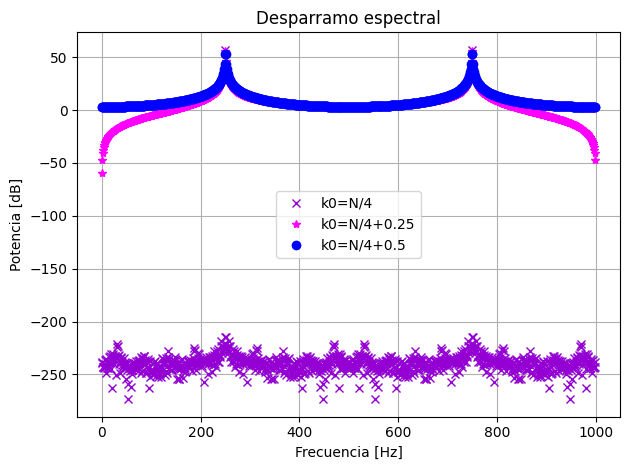

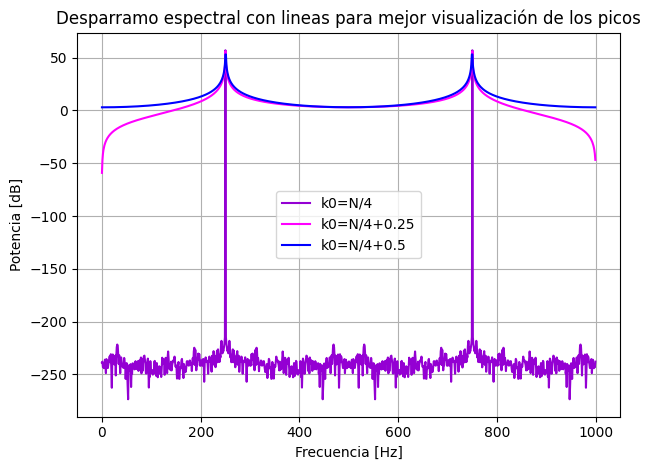

Varianzas:
k0=N/4: 1.0
k0=N/4+0.25: 0.9989999999987679
k0=N/4+0.5: 0.9999980125269956

k0=N/4: Se cumple Parseval
k0=N/4+0.25: Se cumple Parseval
k0=N/4+0.5: Se cumple Parseval



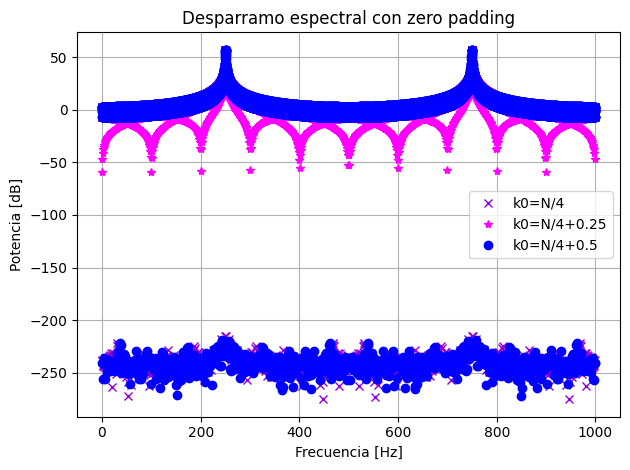

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft


N = 1000       #cant muestras
fs = N         #frec de muestreo
df = fs/N      #resolución espectral
ts = 1/fs      #tiempo entre muestras

 
def sen(frecuencia, nn, amp=1, dc=0, fase=0, fs=2):
    Nn = np.arange(nn) #nn cantidad de muestras
    t = Nn/fs
    x = dc + amp * np.sin(2 * np.pi * frecuencia * t + fase)
    return t, x


amp = np.sqrt(2)   #normalización

t1, x1 = sen(frecuencia=(N/4)*df, nn=N, fs=fs, amp=amp)
t2, x2 = sen(frecuencia=((N/4)+0.25)*df, nn=N, fs=fs, amp=amp)
t3, x3 = sen(frecuencia=((N/4)+0.5)*df, nn=N, fs=fs, amp=amp)

#t fourier
xx1 = fft(x1); xx1abs = np.abs(xx1)
xx2 = fft(x2); xx2abs = np.abs(xx2)
xx3 = fft(x3); xx3abs = np.abs(xx3)



Ft = np.arange(N)*df #eje de frecuencias, va de 0 a fs-df


plt.figure(1)
plt.plot(Ft, 10*np.log10(xx1abs**2), 'x',color='darkviolet', label='k0=N/4')
plt.plot(Ft, 10*np.log10(xx2abs**2), '*', color='fuchsia' , label='k0=N/4+0.25')
plt.plot(Ft, 10*np.log10(xx3abs**2), 'o', color ='blue' ,label='k0=N/4+0.5')
plt.title('Desparramo espectral')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia [dB]')
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

plt.figure(2)
plt.plot(Ft, 10*np.log10(xx1abs**2), color='darkviolet', label='k0=N/4')
plt.plot(Ft, 10*np.log10(xx2abs**2),color='fuchsia' , label='k0=N/4+0.25')
plt.plot(Ft, 10*np.log10(xx3abs**2),  color ='blue' ,label='k0=N/4+0.5')
plt.title('Desparramo espectral con lineas para mejor visualización de los picos')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia [dB]')
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

#varianzas
print("Varianzas:")
print("k0=N/4:", np.var(x1))
print("k0=N/4+0.25:", np.var(x2))
print("k0=N/4+0.5:", np.var(x3))
print()


##B
#energía en tiempo
p1 = np.sum(np.abs(x1)**2)
p2 = np.sum(np.abs(x2)**2)
p3 = np.sum(np.abs(x3)**2)

#energía en frecuencia
P1 = (1/N) * np.sum(np.abs(xx1)**2)
P2 = (1/N) * np.sum(np.abs(xx2)**2)
P3 = (1/N) * np.sum(np.abs(xx3)**2)

tol = 1e-10

# Señal 1
p1 = np.sum(np.abs(x1)**2)
P1 = (1/N) * np.sum(np.abs(xx1)**2)
if np.abs(p1 - P1) < tol:
    print("k0=N/4: Se cumple Parseval")
else:
    print("k0=N/4: No se cumple Parseval")

# Señal 2
p2 = np.sum(np.abs(x2)**2)
P2 = (1/N) * np.sum(np.abs(xx2)**2)
if np.abs(p2 - P2) < tol:
    print("k0=N/4+0.25: Se cumple Parseval")
else:
    print("k0=N/4+0.25: No se cumple Parseval")

# Señal 3
p3 = np.sum(np.abs(x3)**2)
P3 = (1/N) * np.sum(np.abs(xx3)**2)
if np.abs(p3 - P3) < tol:
    print("k0=N/4+0.5: Se cumple Parseval")
else:
    print("k0=N/4+0.5: No se cumple Parseval")

print()




##C
padding = np.zeros(9*N)  #9N ceros

#pego las funciones ala lista de ceros
x1_pad = np.concatenate([x1, padding])
x2_pad = np.concatenate([x2, padding])
x3_pad = np.concatenate([x3, padding])

#a la nueva función le hago la transformada
xx1_pad = fft(x1_pad)
xx2_pad = fft(x2_pad)
xx3_pad = fft(x3_pad)

#
XX1_pad = np.abs(xx1_pad)**2
XX2_pad = np.abs(xx2_pad)**2
XX3_pad = np.abs(xx3_pad)**2

# Nuevo eje de frecuencias
M = len(x1_pad)      #10N
df_pad = fs/M
Ft_pad = np.arange(M)*df_pad


plt.figure(3)
plt.plot(Ft_pad, 10*np.log10(XX1_pad), 'x',color='darkviolet', label='k0=N/4')
plt.plot(Ft_pad, 10*np.log10(XX2_pad), '*', color='fuchsia', label='k0=N/4+0.25')
plt.plot(Ft_pad, 10*np.log10(XX3_pad), 'o', color ='blue' ,label='k0=N/4+0.5')
plt.title('Desparramo espectral con zero padding')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia [dB]')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



## Análisis y desarrollo

Se diseñó una señal senoidal básica y a partir de ella se generaron tres señales cuya única diferencia es la frecuencia:

- **x1**: frecuencia $(k_0 = N/4)$.  
- **x2**: frecuencia $(k_0 + 0.25)$.  
- **x3**: frecuencia $(k_0 + 0.5)$.

Todas las señales fueron normalizadas en amplitud con $(A=\sqrt{2})$ para que la potencia teórica sea aproixmadamente 1.  
Se calculó la DFT de cada señal y se graficó la densidad espectral de potencia (|X|²) en dB:  
- una figura sin *zero padding* (FFT de longitud N)  
- otra con *zero padding* (FFT de longitud 10·N, agregando 9·N ceros al final de la señal).

**Gráfico 1 — Desparramo espectral**
- *x1 (violeta)* : como la señal se encuentra perfectamente alineada con un bin de la DFT, concentra toda su energía en dos picos muy estrechos que se observan claramente, no se observa energía significativa en las demás frecuencias, lo que hace que en la gráfica parezca que desaparece todo excepto los picos principales. Se puede ver que el "piso" está muy bajo en aproximadamente -250dB, lo que significa que la fuga espectral es prácticamente inexistente.
- - *x2 (rosa)*: la frecuencia ahora se encuentra sutilmente desfazada y no coincide perfectamente con un bin, sino que se distribuye entre varios por lo que observa el desparramo espectral. Aunque los picos principales continúan ubicándose cerca de la frecuencia esperada, aparecen lóbulos laterales que dispersan parte de la energía. Esto provoca que el piso no sea tan bajo como en el caso anterior, porque que hay más energía distribuida en el espectro.
- - *x3 (azul)*:  la frecuencia está aún más alejada de un bin y como resultado el leakage es más pronunciado, los picos se ensanchan y el piso se eleva aún más que el de x2 debido a que la energía se reparte casi por todo el espectro.

**Gráfico 2 — Desparramo espectral con zero padding**
- El zero padding aumenta la resolución en frecuencia ($(\Delta f)$ más pequeño).  
- No reduce el leakage, pero hace visibles los ceros y la estructura sinc de los lóbulos laterales.  
- La energía sigue distribuida de la misma forma, solo que el espectro se ve más detallado.


Para todas las señales se comprobó la identidad de Parseval:  
  $ \sum |x[n]|^2 \approx \frac{1}{N}\sum |X[k]|^2 $
  confirmando que la potencia total es ≈ 1 en todos los casos.  
  

## Conclusiones
El análisis realizado permitió observar claramente cómo la alineación de la frecuencia de una señal con los bins de la DFT determina la concentración de energía en el espectro. Si la frecuencia coincide exactamente con un bin, entonces la energía se concentra en picos muy estrechos y el piso espectral es mínimo, indicando ausencia de desparramo. A medida que la frecuencia se aleja de un bin, aparece el leakage, la energía se distribuye entre varios bins y el piso se eleva, mostrando la dispersión espectral.
La implementación de zero padding no elimina el leakage, pero permite visualizar con mayor detalle los lóbulos laterales y la forma sinc del espectro, facilitando la interpretación de cómo se reparte la energía.

## Autoevaluación del aprendizaje
Resolví la tarea con seguridad creo que por primera vez, me ayudó mucho haber hablado y hecho las cosas en clase. A diferencia del trabajo anterior, pude interpretar resultados a partir de los gráficos, y estar en tema con lo que había que observar porque había sido mencionado en clase. También gracias a esto me sentí más segura de los resultados. 
Usé Chatgpt para formatear las ecuaciones en el texto. También lo usé para entender unos errores que me tiraba jupyter al principio.